In [1]:
# Vorstellung: MNIST-Daten!
# http://yann.lecun.com/exdb/mnist/
# FashionMNIST: https://github.com/zalandoresearch/fashion-mnist

import gzip
import numpy as np
from keras.utils import to_categorical

def open_images(filename):
    with gzip.open(filename, "rb") as file:
        data = file.read()
        return np.frombuffer(data, dtype=np.uint8, offset=16)\
            .reshape(-1, 28, 28)\
            .astype(np.float32)


def open_labels(filename):
    with gzip.open(filename, "rb") as file:
        data = file.read()
        return np.frombuffer(data, dtype=np.uint8, offset=8)
    
X_train = open_images("../data/fashion/train-images-idx3-ubyte.gz")
y_train = open_labels("../data/fashion/train-labels-idx1-ubyte.gz")

X_test = open_images("../data/fashion/t10k-images-idx3-ubyte.gz")
y_test = open_labels("../data/fashion/t10k-labels-idx1-ubyte.gz")

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

model = Sequential()

model.add(Conv2D(10, kernel_size=(3, 3), activation="sigmoid", input_shape=(28, 28, 1)))
model.add(Flatten())
model.add(Dense(10, activation="softmax"))

model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])
model.fit(X_train.reshape(60000, 28, 28, 1), y_train, epochs=10, batch_size=1000)

Epoch 1/10
60/60 [==============================] - 3s 48ms/step - loss: 1.8911 - accuracy: 0.5690
Epoch 2/10
60/60 [==============================] - 3s 47ms/step - loss: 0.7602 - accuracy: 0.7455
Epoch 3/10
60/60 [==============================] - 3s 47ms/step - loss: 0.5833 - accuracy: 0.8006
Epoch 4/10
60/60 [==============================] - 3s 46ms/step - loss: 0.5284 - accuracy: 0.8180
Epoch 5/10
60/60 [==============================] - 3s 46ms/step - loss: 0.4681 - accuracy: 0.8353
Epoch 6/10
60/60 [==============================] - 3s 48ms/step - loss: 0.4499 - accuracy: 0.8435
Epoch 7/10
60/60 [==============================] - 3s 46ms/step - loss: 0.4001 - accuracy: 0.8593
Epoch 8/10
60/60 [==============================] - 3s 47ms/step - loss: 0.3685 - accuracy: 0.8685
Epoch 9/10
60/60 [==============================] - 3s 47ms/step - loss: 0.3404 - accuracy: 0.8777
Epoch 10/10
60/60 [==============================] - 3s 46ms/step - loss: 0.3304 - accuracy: 0.8805


In [10]:
print(model.layers)
print("Einzelne Layer:")
print(model.layers[0])
print("Gewichte der Layer:")
model.layers[0].weights[0]

[<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7ff99aa4ba30>, <tensorflow.python.keras.layers.core.Flatten object at 0x7ff97df161c0>, <tensorflow.python.keras.layers.core.Dense object at 0x7ff97df16fa0>]
Einzelne Layer:
Gewichte der Layer:


<tf.Variable 'conv2d/kernel:0' shape=(3, 3, 1, 10) dtype=float32, numpy=
array([[[[-0.1424251 , -0.08169495,  0.05267952, -0.3766992 ,
           0.06351596,  0.12520212,  0.12314769,  0.07553494,
          -0.1939623 ,  0.13784179]],

        [[-0.16632025,  0.11875755,  0.03387229, -0.1563759 ,
           0.07545212, -0.25529462, -0.29844853,  0.22090445,
           0.00065428, -0.00294788]],

        [[-0.21672049, -0.10710628, -0.08003471, -0.08129453,
           0.08741103, -0.14995725, -0.05118316, -0.24291089,
           0.07610297, -0.21774936]]],


       [[[ 0.1666791 , -0.1229443 , -0.18022026, -0.10844238,
          -0.10965989, -0.04593079,  0.09328479, -0.13511121,
          -0.19698033,  0.05918391]],

        [[-0.12306833,  0.18345338, -0.02423183,  0.20330259,
           0.01374796, -0.17944752, -0.08260337, -0.06580988,
          -0.09390406,  0.1731022 ]],

        [[-0.18215606, -0.0136807 ,  0.04831422,  0.06291549,
          -0.06719925, -0.05068004,  0.0780225 ,

In [11]:
import keras.backend as K

#Gewichte des Layers werden aus dem Speicher geladen
data = K.eval(model.layers[0].weights[0])
print(data)

[[[[-0.1424251  -0.08169495  0.05267952 -0.3766992   0.06351596
     0.12520212  0.12314769  0.07553494 -0.1939623   0.13784179]]

  [[-0.16632025  0.11875755  0.03387229 -0.1563759   0.07545212
    -0.25529462 -0.29844853  0.22090445  0.00065428 -0.00294788]]

  [[-0.21672049 -0.10710628 -0.08003471 -0.08129453  0.08741103
    -0.14995725 -0.05118316 -0.24291089  0.07610297 -0.21774936]]]


 [[[ 0.1666791  -0.1229443  -0.18022026 -0.10844238 -0.10965989
    -0.04593079  0.09328479 -0.13511121 -0.19698033  0.05918391]]

  [[-0.12306833  0.18345338 -0.02423183  0.20330259  0.01374796
    -0.17944752 -0.08260337 -0.06580988 -0.09390406  0.1731022 ]]

  [[-0.18215606 -0.0136807   0.04831422  0.06291549 -0.06719925
    -0.05068004  0.0780225   0.07692018  0.13110143 -0.1706639 ]]]


 [[[ 0.14120781 -0.15365289 -0.15947229  0.02618728  0.00980657
     0.01070294  0.09363831 -0.02105118  0.04516167 -0.02386375]]

  [[-0.00702017  0.10016394  0.01477573 -0.01582154 -0.17663595
     0.13671729

In [12]:
data[:, :, :, 0].reshape(3, 3)

array([[-0.1424251 , -0.16632025, -0.21672049],
       [ 0.1666791 , -0.12306833, -0.18215606],
       [ 0.14120781, -0.00702017, -0.03047061]], dtype=float32)

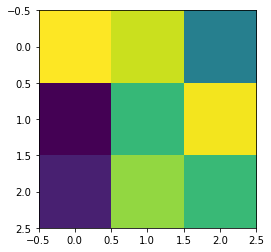

In [14]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.imshow(data[:, :, :, 2].reshape(3, 3))
plt.show()

### Vergleich: https://en.wikipedia.org/wiki/Sobel_operator

$ {\displaystyle \mathbf {G} _{x}={\begin{bmatrix}+1&0&-1\\+2&0&-2\\+1&0&-1\end{bmatrix}}*\mathbf {A} \quad {\mbox{and}}\quad \mathbf {G} _{y}={\begin{bmatrix}+1&+2&+1\\0&0&0\\-1&-2&-1\end{bmatrix}}*\mathbf {A} } $ 